In [27]:
import textblob
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf
from datetime import datetime

In [30]:
path = "/Users/madha/Documents/GlobalAIHackathon/realdonaldtrump.csv"
data = pd.read_csv(path, encoding='ISO-8859-1')
data.drop(['mentions','hashtags'],axis = 1,inplace = True)
data.head()

,id,link,date,content,retweets,favorites
0,1.698309e+09,https://twitter.com/realDonaldTrump/status/169...,5/4/2009 13:54,Be sure to tune in and watch Donald Trump on L...,510.0,917.0
1,1.701461e+09,https://twitter.com/realDonaldTrump/status/170...,5/4/2009 20:00,Donald Trump will be appearing on The View tom...,34.0,267.0
2,1.737480e+09,https://twitter.com/realDonaldTrump/status/173...,5/8/2009 8:38,Donald Trump reads Top Ten Financial Tips on L...,13.0,19.0
3,1.741161e+09,https://twitter.com/realDonaldTrump/status/174...,5/8/2009 15:40,New Blog Post: Celebrity Apprentice Finale and...,11.0,26.0
4,1.773561e+09,https://twitter.com/realDonaldTrump/status/177...,5/12/2009 9:07,"""My persona will never be that of a wallflower...",1375.0,1945.0


In [53]:
min(data['date'])

datetime.date(2009, 5, 4)

In [31]:
def remove_space(text) : 
    text.strip()
    text.split()
    return ' '.join(text)

def edits1(word):
    letters='abcdefghijklmnopqrstuvwxyz'
    splits=[(word[:i], word[i:]) for i in range(len(word)+1)]
    deletes=[L+R[1:] for L,R in splits if R]
    transposes=[L+R[1] +R[0] + R[2:] for L,R in splits if len(R)>1]
    replaces = [L+c+R[1:] for L,R in splits if R for c in letters]
    inserts = [L+c+ R for L,R in splits for c in letters]
    return set(deletes+transposes+replaces+inserts)

def edits2(word):
    return(e2 for e1 in edits1(word) for e2 in edits1(e1))

contraction = {'cause' : 'because',
              'aint' : 'am not',
              'are\nt' : 'are not'}

def mapping_replacer(x,dic) :
    for words in dic.keys() : 
        if ' ' + words + ' ' in x : 
            x.replace(' ' + words + ' ', ' ' + dic[words] + ' ')
    return x

In [32]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
  
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer

nltk.LancasterStemmer
ls = LancasterStemmer()
lem = WordNetLemmatizer()

def normalize(text) : 
    words = word_tokenize(text)
    words_stem = [ls.stem(w) for w in words]
    words_lem = [lem.lemmatize(w) for w in words_stem]
    return words_lem

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
import emoji
import re 
def convert_emojis(text):
    for emot in emoji.UNICODE_EMOJI:
        text = re.sub(r'('+emot+')', "_".join(emoji.UNICODE_EMOJI[emot].replace(",","").replace(":","").split()), text)
    return text

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)

    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\'','', text)
    
    return text

In [34]:
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
def remove_stopword(text):
    stop_words = stopwords.words('english')
    stopwords_dict = Counter(stop_words)
    text = ' '.join([word for word in text.split() if word not in stopwords_dict])
    return text

def tokenise(text):
    words = word_tokenize(text) 
    return words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
import re
data['content'] = data['content'].map(lambda x: re.sub(r'\W+', ' ', x))
data['content'] = data['content'].replace(r'\W+', ' ', regex=True)
data['content']=data['content'].apply(lambda x: mapping_replacer(x, contraction))
data['content'] = data['content'].apply(lambda x:clean_text(x))
data['content']=data['content'].apply(lambda x: remove_stopword(x))
data['content']=data['content'].apply(lambda x: normalize(x))
data.head()

,id,link,date,content,retweets,favorites
0,1.698309e+09,https://twitter.com/realDonaldTrump/status/169...,5/4/2009 13:54,"[sur, tun, watch, donald, trump, lat, night, d...",510.0,917.0
1,1.701461e+09,https://twitter.com/realDonaldTrump/status/170...,5/4/2009 20:00,"[donald, trump, appear, view, tomorrow, morn, ...",34.0,267.0
2,1.737480e+09,https://twitter.com/realDonaldTrump/status/173...,5/8/2009 8:38,"[donald, trump, read, top, ten, fin, tip, lat,...",13.0,19.0
3,1.741161e+09,https://twitter.com/realDonaldTrump/status/174...,5/8/2009 15:40,"[new, blog, post, celebr, appr, fin, lesson, l...",11.0,26.0
4,1.773561e+09,https://twitter.com/realDonaldTrump/status/177...,5/12/2009 9:07,"[person, nev, wallflow, iâ, rath, build, wal, ...",1375.0,1945.0


In [45]:
from textblob import TextBlob

def sentiment(tweet): 
    analysis = TextBlob(tweet) 
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'
    
data['sentiment']=data['content'].apply(lambda x: sentiment(' '.join(x)))
data["polarity"] = data["content"].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
data.head()

,id,link,date,content,retweets,favorites,sentiment,polarity
0,1.698309e+09,https://twitter.com/realDonaldTrump/status/169...,2009-05-04,"[sur, tun, watch, donald, trump, lat, night, d...",510.0,917.0,positive,0.250000
1,1.701461e+09,https://twitter.com/realDonaldTrump/status/170...,2009-05-04,"[donald, trump, appear, view, tomorrow, morn, ...",34.0,267.0,positive,0.136364
2,1.737480e+09,https://twitter.com/realDonaldTrump/status/173...,2009-05-08,"[donald, trump, read, top, ten, fin, tip, lat,...",13.0,19.0,positive,0.250000
3,1.741161e+09,https://twitter.com/realDonaldTrump/status/174...,2009-05-08,"[new, blog, post, celebr, appr, fin, lesson, l...",11.0,26.0,positive,0.136364
4,1.773561e+09,https://twitter.com/realDonaldTrump/status/177...,2009-05-12,"[person, nev, wallflow, iâ, rath, build, wal, ...",1375.0,1945.0,neutral,0.000000


In [37]:
df = px.data.tips()
fig = px.histogram(df, x=data['sentiment'])
fig.show()

In [46]:
#group to single day
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.date
groupeddf = data.groupby('date',as_index=False)['polarity'].mean()
groupeddf['date'] = pd.to_datetime(groupeddf['date'])
groupeddf.tail()fig = px.bar(groupeddf, x='date', y='polarity',title='overall twitter sentiment per day')
fig.show()

,date,polarity
3342,2020-07-21,0.078451
3343,2020-07-22,0.021358
3344,2020-07-23,0.032265
3345,2020-07-24,0.063646
3346,2020-07-25,0.127409


In [68]:
#vizualization of tweet sentiment per day
fig = px.line(groupeddf, x='date', y='polarity',title='overall twitter sentiment per day')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [54]:
#import Stock data on same date range as tweet data
tkrdf = yf.download('NDAQ','2009-5-4','2020-7-25')
tkrdf = tkrdf.reset_index(level=0)
tkrdf.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-04,19.500000,20.520000,19.370001,20.360001,17.537607,3509300
1,2009-05-05,20.129999,20.690001,19.879999,20.100000,17.313650,3073100
2,2009-05-06,20.200001,21.799999,20.200001,21.610001,18.614330,5676400
3,2009-05-07,21.639999,21.639999,19.170000,20.040001,17.261969,7932800
4,2009-05-08,20.080000,20.450001,19.590000,20.379999,17.554838,6416500


In [55]:
#summarize momentum on each day
tkrdf['diff'] = 0.00
prev = tkrdf['Close'][0]
for index,row in tkrdf.iterrows():
    tkrdf._set_value(index,'diff',row['Close']-prev)     
    prev=row['Close']
tkrdf.head()  

,Date,Open,High,Low,Close,Adj Close,Volume,diff
0,2009-05-04,19.500000,20.520000,19.370001,20.360001,17.537607,3509300,0.000000
1,2009-05-05,20.129999,20.690001,19.879999,20.100000,17.313650,3073100,-0.260000
2,2009-05-06,20.200001,21.799999,20.200001,21.610001,18.614330,5676400,1.510000
3,2009-05-07,21.639999,21.639999,19.170000,20.040001,17.261969,7932800,-1.570000
4,2009-05-08,20.080000,20.450001,19.590000,20.379999,17.554838,6416500,0.339998


In [58]:
#vizualize stock momentum per day
fig = px.line(tkrdf, x='Date', y='diff',title='Nasdaq stock price diff')
fig.update_xaxes(rangeslider_visible=True)
fig.show()


In [59]:
#Combine tweet and stock data
mergedf = pd.merge(tkrdf, groupeddf.rename(columns={'date':'Date'}), on='Date', how='inner')
mergedf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,diff,polarity
2480,2020-07-20,128.330002,131.669998,128.320007,131.300003,131.300003,790100,2.860001,0.069444
2481,2020-07-21,130.690002,131.850006,129.490005,131.009995,131.009995,933300,-0.290009,0.078451
2482,2020-07-22,133.009995,135.320007,131.550003,134.100006,134.100006,1231200,3.090012,0.021358
2483,2020-07-23,134.199997,135.509995,131.000000,131.410004,131.410004,938100,-2.690002,0.032265
2484,2020-07-24,131.289993,131.389999,129.050003,130.559998,130.559998,898700,-0.850006,0.063646


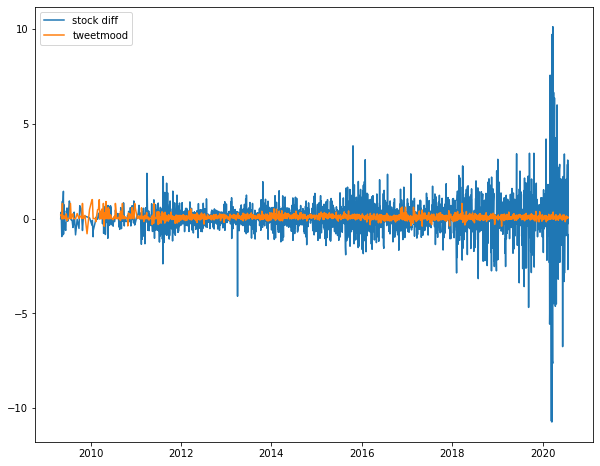

In [65]:
plt.figure(figsize=(10, 8))
plt.plot(mergedf['Date'],mergedf['diff'],label='stock diff')
plt.plot(mergedf['Date'],mergedf['polarity'],label='tweetmood')
plt.legend(loc='best')
plt.show()